In [1]:
import pandas as pd
import numpy as np

In [2]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
%%capture
! pip install seaborn

In [4]:
# Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [5]:
#How to choose the right visualization method?
#When visualizing individual variables, it is important to first understand what type of variable you are dealing with. 
#This will help us find the right visualization method for that variable.

# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [6]:
df.corr().round(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.00,0.47,-0.54,-0.37,-0.24,-0.55,-0.23,-0.11,-0.14,-0.01,-0.18,0.08,0.28,-0.04,0.04,-0.08,0.07,-0.20,0.20
normalized-losses,0.47,1.00,-0.06,0.02,0.09,-0.37,0.10,0.11,-0.03,0.06,-0.11,0.22,0.24,-0.23,-0.18,0.13,0.24,-0.10,0.10
wheel-base,-0.54,-0.06,1.00,0.88,0.81,0.59,0.78,0.57,0.49,0.16,0.25,0.37,-0.36,-0.47,-0.54,0.58,0.48,0.31,-0.31
length,-0.37,0.02,0.88,1.00,0.86,0.49,0.88,0.69,0.61,0.12,0.16,0.58,-0.29,-0.67,-0.70,0.69,0.66,0.21,-0.21
width,-0.24,0.09,0.81,0.86,1.00,0.31,0.87,0.73,0.54,0.19,0.19,0.62,-0.25,-0.63,-0.68,0.75,0.67,0.24,-0.24
height,-0.55,-0.37,0.59,0.49,0.31,1.00,0.31,0.07,0.18,-0.06,0.26,-0.09,-0.31,-0.05,-0.10,0.14,0.00,0.28,-0.28
curb-weight,-0.23,0.10,0.78,0.88,0.87,0.31,1.00,0.85,0.64,0.17,0.16,0.76,-0.28,-0.75,-0.79,0.83,0.79,0.22,-0.22
engine-size,-0.11,0.11,0.57,0.69,0.73,0.07,0.85,1.00,0.57,0.21,0.03,0.82,-0.26,-0.65,-0.68,0.87,0.75,0.07,-0.07
bore,-0.14,-0.03,0.49,0.61,0.54,0.18,0.64,0.57,1.00,-0.06,0.00,0.57,-0.27,-0.58,-0.59,0.54,0.55,0.05,-0.05
stroke,-0.01,0.06,0.16,0.12,0.19,-0.06,0.17,0.21,-0.06,1.00,0.19,0.10,-0.07,-0.03,-0.04,0.08,0.04,0.24,-0.24


In [8]:
df[['bore','stroke' ,'compression-ratio','horsepower']].corr().round(2)

,bore,stroke,compression-ratio,horsepower
bore,1.00,-0.06,0.00,0.57
stroke,-0.06,1.00,0.19,0.10
compression-ratio,0.00,0.19,1.00,-0.21
horsepower,0.57,0.10,-0.21,1.00


/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 56018.180492602216)

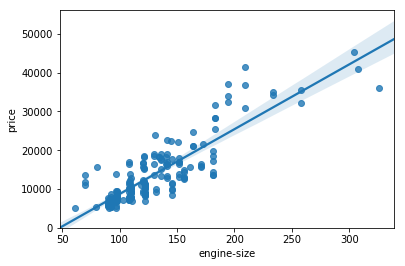

In [9]:
# Engine size as potential predictor variable of price - scatter plot

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [10]:
# Since the graph is linearly increasing hence we can find correlation co-efficient

df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


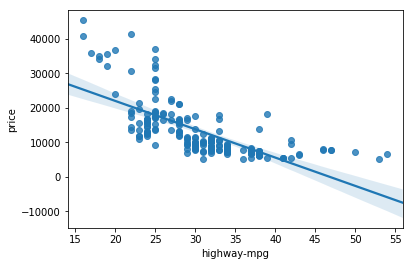

In [11]:
# Highway mpg is a potential predictor variable of price

sns.regplot(x="highway-mpg", y="price", data=df)

In [12]:
# Scatter plot indicates an inverse/negative relationship
df[['highway-mpg', 'price']].corr().round(2)

,highway-mpg,price
highway-mpg,1.0,-0.7
price,-0.7,1.0


(0, 47436.15466888818)

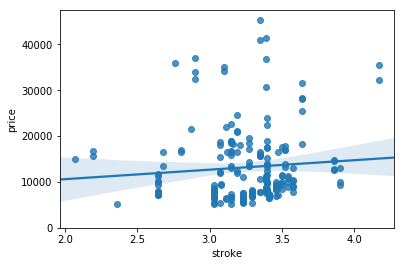

In [14]:
# Finding relationship b/w stroke and price

sns.regplot(x='stroke', y = 'price', data = df)
plt.ylim(0,)

In [15]:
# There is a weak correlation b/w stroke and price, nevertheless let's find correlation co-efficient for practice
df[['stroke','price']].corr().round(2)

,stroke,price
stroke,1.00,0.08
price,0.08,1.00


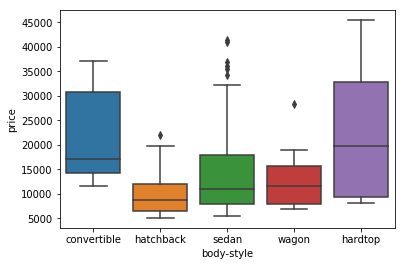

In [16]:
# Let's look at the relationship between "body-style" and "price"

sns.boxplot(x ='body-style', y = 'price', data = df)

In [18]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean().round(2)
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.00
1,4wd,sedan,12647.33
2,4wd,wagon,9095.75
3,fwd,convertible,11595.00
4,fwd,hardtop,8249.00
5,fwd,hatchback,8396.39
6,fwd,sedan,9811.80
7,fwd,wagon,9997.33
8,rwd,convertible,23949.60
9,rwd,hardtop,24202.71


In [19]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  NaN       NaN   7603.00  12647.33   9095.75
fwd              11595.0   8249.00   8396.39   9811.80   9997.33
rwd              23949.6  24202.71  14337.78  21711.83  16994.22

In [20]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  0.0      0.00   7603.00  12647.33   9095.75
fwd              11595.0   8249.00   8396.39   9811.80   9997.33
rwd              23949.6  24202.71  14337.78  21711.83  16994.22

In [24]:
# Correlation & Causation, Pearson co-efficient gives linear relationship
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


In [26]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2) 

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [27]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [28]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23
